## Import data

In [1]:
import numpy as np

data = np.genfromtxt('../data/exampleData.csv', delimiter=',')

frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]

# keep only the impedance data in the first quandrant
frequencies = frequencies[np.imag(Z) < 0]
Z = Z[np.imag(Z) < 0]

## Define impedance model

In [2]:
from impedance.circuits import CustomCircuit

initial_guess = [.01, .01, 100, .01, .05, 100, 1]
circuit = CustomCircuit('R0-p(R1,C1)-p(R2-W1/W2,C2)', initial_guess=initial_guess)

## Fit the impedance model to data

In [3]:
circuit.fit(frequencies, Z)

print(circuit)


-------------------------------
Circuit: None
Circuit string: R0-p(R1,C1)-p(R2-W1/W2,C2)
Fit: True

-------------------------------
Fit parameters:
	R0 = 1.65e-02
	R1 = 8.68e-03
	C1 = 3.32e+00
	R2 = 5.39e-03
	W1 = 6.31e-02
	W2 = 2.33e+02
	C2 = 2.20e-01



## Analyze/Visualize the results

In [4]:
Z_fit = circuit.predict(frequencies)

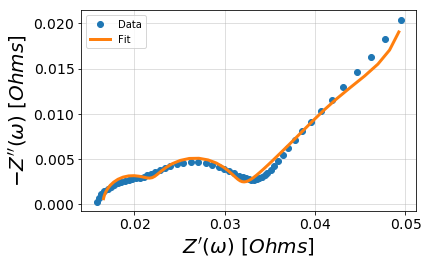

In [5]:
import matplotlib.pyplot as plt
from impedance.plotting import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(ax, frequencies, Z, fmt='o')
plot_nyquist(ax, frequencies, Z_fit, fmt='-')

plt.legend(['Data', 'Fit'])
plt.show()

In [6]:
fig.savefig('example_fit_fig.png', dpi=300, bbox_inches='tight')